Salary Prediction with Machine Learning

Değişkenler
AtBat: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı Hits: 1986-1987 sezonundaki isabet sayısı
HmRun: 1986-1987 sezonundaki en değerli vuruş sayısı
Runs: 1986-1987 sezonunda takımına kazandırdığı sayı
RBI: Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı Walks: Karşı oyuncuya yaptırılan hata sayısı
Years: Oyuncunun major liginde oynama süresi (sene)
CAtBat: Oyuncunun kariyeri boyunca topa vurma sayısı
CHits: Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı
CHmRun: Oyucunun kariyeri boyunca yaptığı en değerli sayısı
CRuns: Oyuncunun kariyeri boyunca takımına kazandırdığı sayı
CRBI: Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı
CWalks: Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı
League: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör Division: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör PutOuts: Oyun icinde takım arkadaşınla yardımlaşma
Assits: 1986-1987 sezonunda oyuncunun yaptığı asist sayısı
Errors: 1986-1987 sezonundaki oyuncunun hata sayısı
Salary: Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden)
NewLeague: 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör

Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol oyuncularının maaş tahminleri için bir makine öğrenmesi projesi gerçekleştirilebilir mi?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
# çıktının tek bir satırda olmasını sağlar.
pd.set_option('display.expand_frame_repr', False)


In [2]:
df=pd.read_csv("hitters.csv")

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
#data setimizi değişkenleri ve içerdikleri satır sayıları ve data tipleri
#açısından kontrol edebiliriz.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
#Veri setimizde eksik değer olup olmadığını kontrol edebiliriz
#sadece hedef değişkenimizde eksik değer yer almaktadır.

df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
#Hedef değişkende yer alan eksik değerlerin veri setimizdeki oranına bakalım:

df["Salary"].isnull().sum() * 100 / df.shape[0]


18.322981366459626

In [7]:
#Hedef değişkenimizde yer alan eksik değerlere atama yapmamız durumunda modelin tahmin
#etme sürecinde de yanlılık oluşturabiliriz, bu nedenle oransal olarak da çok yüksek olmayan
#boş değerleri data setimizden çıkarabiliriz.

df.dropna(subset=["Salary"],inplace=True)
df["Salary"].isnull().sum()

0

In [8]:
#Sayılar değerlere ilişkin istatistiksel bilgileri ve aykırı değerlerin olup olmadığını 
#kontrol edebiliriz.
#mean ve 50% değerlerinin farklılaştığı CAtBat,CHits,CHmRun,CRBI,Assists,Salary
#değişkenlerinde aykırı değerlerin olduğu görülüyor.
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [9]:
#İlk olarak veri setimizdeki numeric ve kategorik değişkenlerimizi belirleyebiliriz.

num_cols= [col for col in df.columns if df[col].dtype in ["int64","float64"]]
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [10]:
cat_cols= [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['League', 'Division', 'NewLeague']

In [11]:
#Aykırı değerler için kontrollerimizi yapmaya başlayabiliriz,
#ilk olarak threshold'ların tespit edilmesi için fonksiyonumuz;

def outlier_thresholds(dataframe, col_name, q1=0.10,q3=0.90):
    Q1=dataframe[col_name].quantile(q1)
    Q3=dataframe[col_name].quantile(q3)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    return low_limit,up_limit
    

In [12]:
#Tespit edilen thresholdlara göre aykırı değerlerin olup olmadığının 
#kontrolü için fonksiyonumuz:

def check_outlier(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]> up_limit)|(dataframe[col_name]< low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col,check_outlier(df,col))
    


AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns True
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


In [13]:
#Aykırı değer olması durumunda bu değerleri threshold değerleri ile replace edebilir ya da 
#data setinden kaldırabiliriz.

def replace_with_threshold(dataframe, col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    dataframe.loc[dataframe[col_name]> up_limit, col_name]= up_limit
    dataframe.loc[dataframe[col_name]< low_limit, col_name]= low_limit

In [14]:
#Veri setimizden data kaybetmemek için aykırı değerleri threshold 
#değerleri ile güncelleyebiliriz.

outlier_list=["CHits","CHmRun","CRuns","CWalks"]

for col in outlier_list:
    replace_with_threshold(df,col)

In [15]:
for col in num_cols:
    print(col,check_outlier(df,col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


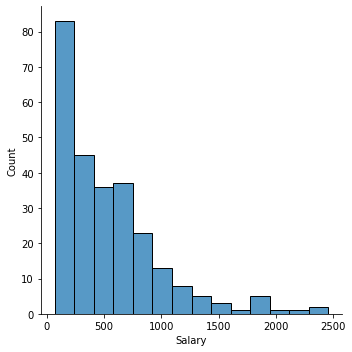

In [16]:
#sayısal değişkenimizin dağılımına bakabiliriz, right-skewed olarak göründüğü için 
#modelimizin başarılı tahmin yapabilmesi adına hedef değişkenimizde aykırı değerlerin
#yer almaması gerekiyor.Bu değişkenimiz için model öncesi logaritmik dönüşüm yapacağız.

sns.displot(data=df, x="Salary")

<function matplotlib.pyplot.show(close=None, block=None)>

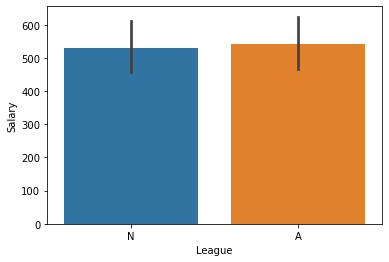

In [17]:
#categorik değişkenlerimiz ile hedef değişkenimiz arasındaki ilişkiyi kontrol edebiliriz.
sns.barplot(data=df, x="League", y="Salary") #league değişkeni bazında maaşlarda farklılık
#bulunmuyor.
plt.show

<AxesSubplot:xlabel='Division', ylabel='Salary'>

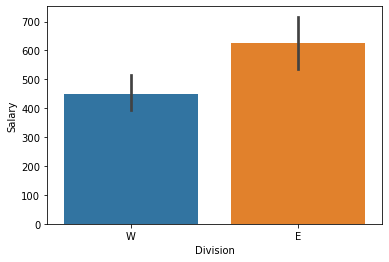

In [18]:
#E divisionunda yer alan oyuncuların maaşlarının daha yüksek olduğunu görüyoruz.
sns.barplot(data=df, x="Division", y="Salary")

<AxesSubplot:xlabel='NewLeague', ylabel='Salary'>

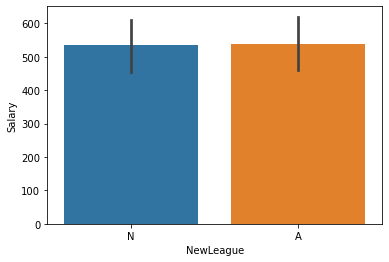

In [19]:
#NewLeague değişkeni bazında da maaşlarda farklılık bulunmuyor.
sns.barplot(data=df, x="NewLeague", y="Salary")

<AxesSubplot:xlabel='Years', ylabel='Salary'>

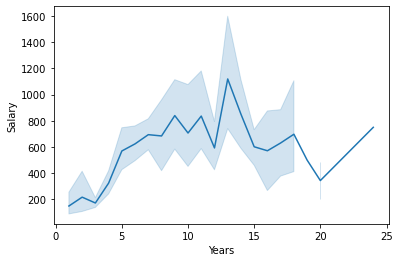

In [20]:
#yıllara göre maaşların nasıl değiştiğine bakabiliriz.
#Yaklaşık 12-13.yıla doğru tecrübe arttıkça maaşın arttığını ancak bu yıllardan tecrübe ile 
#maaş artışının ters orantılı olarak değiştini görüyoruz.

sns.lineplot(data=df, x="Years", y="Salary")

In [21]:
#Data setimizde yer alan mevcut değişkenlerimizden oyuncunun kariyeri boyunce ve
#son sezonda gösterdiği performansa görebaşarı trendini çıkarabiliriz;

#Son sezon boyunca yapılan atışlardan başarılı isabet oranı:
df[df["AtBat"]==0]
df["Hits_Bats_rate"] = df["Hits"] / df["AtBat"]

In [22]:
#Kariyer boyunca yapılan atışlardan başarılı isabet oranı:
df[df["CAtBat"]==0]
df["CHits_Bats_rate"] = df["CHits"] / df["CAtBat"]

In [23]:
#Sezon başına başarı oran ortalaması:
df[df["Years"]==0]
df["CHits_Bats_mean"] = (df["CHits"] / df["CAtBat"])/ df["Years"]

In [24]:
#Son sezon yapılan başarılı- isabet ettirilen atışlarına sezon başına yapılanlara oranı:
df["CHits_Hits_rate"] = df["Hits_Bats_rate"] / df["CHits_Bats_mean"]

In [25]:
#Sezon başına ortalama kazandırılan sayı:
df["Cruns_rate"] = df["CRuns"] / df["Years"]

In [26]:
#Son sezon takıma kazandırılan sayıların seon başına kazandırılan sayıya oranı:
df["CRuns_Runs_rate"] = df["Runs"] / df["Cruns_rate"]

In [27]:
#Sezon başına karşı oyuncuya yaptırılan hata sayısı:
df["CWalks_rate"] = df["CWalks"] / df["Years"]

In [28]:
#Son sezon karşı oyuncuya yaptırılan hata oranının sezon başına yaptırılan sayıya oranı:
df["CWalks_Walks_rate"] = df["Walks"] / df["CWalks_rate"]

In [29]:
#Sezon başına yapılan en değerli vuruş sayısı:
df["CHmRun_rate"] = df["CHmRun"] / df["Years"]

In [30]:
#Son sezon yapılan en değerli vuruşların sezon başına yapılan vuruşlara oranı:
df["CHmRun_HmRun_rate"] = df["HmRun"] / df["CHmRun_rate"]

In [31]:
#Sezon başına koşu yaptırılan oyuncu sayısı:
df["CRBI_rate"] = df["CRBI"] / df["Years"]

In [32]:
#Son sezon koşu yaptırılan oyuncuların sezon başına koşu yaptırılan oyunculara oranı:
df["CRBI_RBI_rate"] = df["RBI"] / df["CRBI_rate"]

In [33]:
#Yardımlaşma ve assist sayısının oyuncu tarafından yapılan hataya oranı:
df["PutOuts_assist"]= df["PutOuts"] * df["Assists"]
df["PutOuts_assist_errors"] = df["PutOuts_assist"] / df["Errors"]

In [34]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,...,NewLeague,Hits_Bats_rate,CHits_Bats_rate,CHits_Bats_mean,CHits_Hits_rate,Cruns_rate,CRuns_Runs_rate,CWalks_rate,CWalks_Walks_rate,CHmRun_rate,CHmRun_HmRun_rate,CRBI_rate,CRBI_RBI_rate,PutOuts_assist,PutOuts_assist_errors
1,315,81,7,24,38,39,14,3449,835.0,69.0,321.0,414,375.0,N,W,...,N,0.257143,0.242099,0.017293,14.869940,22.928571,1.046729,26.785714,1.456000,4.928571,1.420290,29.571429,1.285024,27176,2717.600000
2,479,130,18,66,72,76,3,1624,457.0,63.0,224.0,266,263.0,A,W,...,A,0.271399,0.281404,0.093801,2.893336,74.666667,0.883929,87.666667,0.866920,21.000000,0.857143,88.666667,0.812030,72160,5154.285714
3,496,141,20,65,78,37,11,5628,1575.0,225.0,828.0,838,354.0,N,E,...,N,0.284274,0.279851,0.025441,11.173871,75.272727,0.863527,32.181818,1.149718,20.454545,0.977778,76.181818,1.023866,2200,733.333333
4,321,87,10,39,42,30,2,396,101.0,12.0,48.0,46,33.0,N,E,...,N,0.271028,0.255051,0.127525,2.125289,24.000000,1.625000,16.500000,1.818182,6.000000,1.666667,23.000000,1.826087,32200,8050.000000
5,594,169,4,74,51,35,11,4408,1133.0,19.0,501.0,336,194.0,A,W,...,A,0.284512,0.257033,0.023367,12.175999,45.545455,1.624750,17.636364,1.984536,1.727273,2.315789,30.545455,1.669643,118722,4748.880000


In [35]:
#categorik değişkenlerimiz için model öncesi encoding işlemlerimizi yapabiliriz.

binary_cols=[col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique()==2]

binary_cols

['League', 'Division', 'NewLeague']

In [36]:
def label_encoder(dataframe, col):
    labelencoder=LabelEncoder()
    dataframe[col]=labelencoder.fit_transform(dataframe[col])
    return dataframe

for col in binary_cols:
    label_encoder(df, col)
    

In [37]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,...,NewLeague,Hits_Bats_rate,CHits_Bats_rate,CHits_Bats_mean,CHits_Hits_rate,Cruns_rate,CRuns_Runs_rate,CWalks_rate,CWalks_Walks_rate,CHmRun_rate,CHmRun_HmRun_rate,CRBI_rate,CRBI_RBI_rate,PutOuts_assist,PutOuts_assist_errors
1,315,81,7,24,38,39,14,3449,835.0,69.0,321.0,414,375.0,1,1,...,1,0.257143,0.242099,0.017293,14.869940,22.928571,1.046729,26.785714,1.456000,4.928571,1.420290,29.571429,1.285024,27176,2717.600000
2,479,130,18,66,72,76,3,1624,457.0,63.0,224.0,266,263.0,0,1,...,0,0.271399,0.281404,0.093801,2.893336,74.666667,0.883929,87.666667,0.866920,21.000000,0.857143,88.666667,0.812030,72160,5154.285714
3,496,141,20,65,78,37,11,5628,1575.0,225.0,828.0,838,354.0,1,0,...,1,0.284274,0.279851,0.025441,11.173871,75.272727,0.863527,32.181818,1.149718,20.454545,0.977778,76.181818,1.023866,2200,733.333333
4,321,87,10,39,42,30,2,396,101.0,12.0,48.0,46,33.0,1,0,...,1,0.271028,0.255051,0.127525,2.125289,24.000000,1.625000,16.500000,1.818182,6.000000,1.666667,23.000000,1.826087,32200,8050.000000
5,594,169,4,74,51,35,11,4408,1133.0,19.0,501.0,336,194.0,0,1,...,0,0.284512,0.257033,0.023367,12.175999,45.545455,1.624750,17.636364,1.984536,1.727273,2.315789,30.545455,1.669643,118722,4748.880000


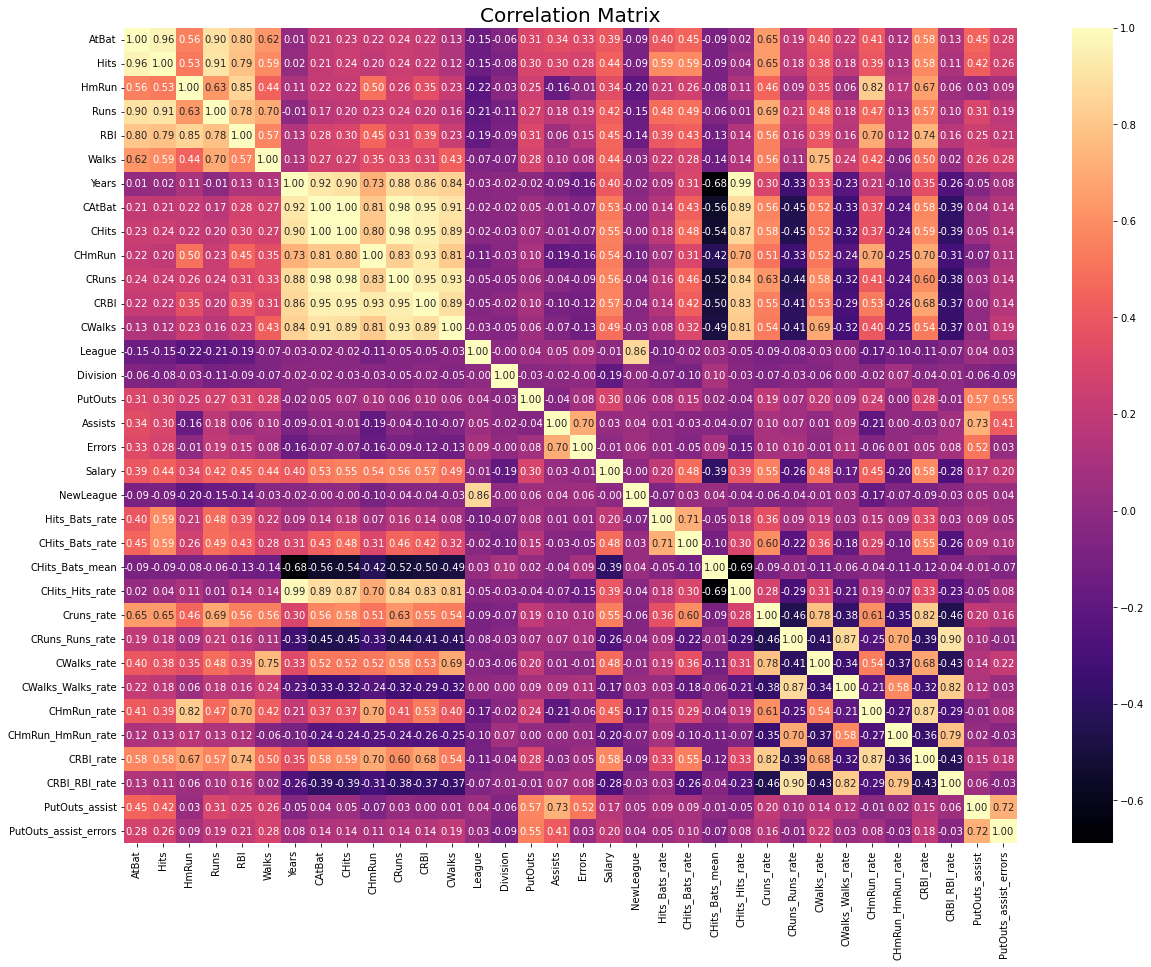

In [38]:
#değişkenlerimizin birbiri ve hedef değişken ile çoklu doğrusallığının olup olmadığına
#bakabiliriz.

f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [39]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,...,NewLeague,Hits_Bats_rate,CHits_Bats_rate,CHits_Bats_mean,CHits_Hits_rate,Cruns_rate,CRuns_Runs_rate,CWalks_rate,CWalks_Walks_rate,CHmRun_rate,CHmRun_HmRun_rate,CRBI_rate,CRBI_RBI_rate,PutOuts_assist,PutOuts_assist_errors
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.228980,0.218064,0.238495,0.221393,0.133243,0.153176,0.056341,...,0.089838,0.395411,0.452204,0.091305,0.016207,0.646419,0.194944,0.399954,0.215470,0.414245,0.119302,0.575837,0.133606,0.447065,0.275472
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.239496,0.195777,0.240171,0.219384,0.123299,0.153522,0.083266,...,0.094990,0.587099,0.589505,0.088650,0.043618,0.649700,0.184002,0.381423,0.184244,0.388486,0.126228,0.579108,0.110445,0.419591,0.262610
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.221376,0.502850,0.259720,0.349858,0.227618,0.222965,0.034851,...,0.199424,0.214992,0.263438,0.081903,0.112678,0.455085,0.089532,0.345529,0.061777,0.817567,0.168086,0.667398,0.063174,0.034937,0.091866
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,0.011975,0.171811,0.195351,0.234166,0.239264,0.202335,0.164121,0.206001,0.107672,...,0.154911,0.478588,0.487826,0.059857,0.006739,0.694156,0.212350,0.483900,0.176928,0.465780,0.126035,0.565225,0.102117,0.306453,0.187085
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.296159,0.453738,0.308579,0.387777,0.234006,0.185858,0.090157,...,0.143549,0.392516,0.431795,0.127171,0.138832,0.555367,0.158041,0.390222,0.159084,0.698578,0.116535,0.738671,0.156865,0.247776,0.206976
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.273837,0.346568,0.334141,0.312697,0.429607,0.065760,0.072732,...,0.028461,0.224098,0.284172,0.135534,0.136616,0.557772,0.106566,0.752427,0.243199,0.421991,0.056214,0.497142,0.015218,0.263212,0.276389
Years,0.012725,0.018598,0.113488,0.011975,0.129668,0.134793,1.000000,0.915681,0.899807,0.728574,0.877276,0.863809,0.837638,0.032893,0.020316,...,0.023964,0.086235,0.305723,0.675301,0.986166,0.297212,0.332946,0.330160,0.234080,0.205337,0.096896,0.350614,0.263895,0.050989,0.082981
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995466,0.808179,0.982904,0.950730,0.906619,0.023704,0.018623,...,0.004294,0.143046,0.426610,0.555551,0.885223,0.564874,0.452023,0.519717,0.328387,0.367937,0.241085,0.575947,0.391450,0.041445,0.137585
CHits,0.228980,0.239496,0.221376,0.195351,0.296159,0.273837,0.899807,0.995466,1.000000,0.798886,0.984247,0.949854,0.890200,0.024700,0.025374,...,0.000789,0.181791,0.481569,0.539944,0.867925,0.584695,0.446291,0.516171,0.322311,0.369907,0.236755,0.590838,0.387265,0.045376,0.135427
CHmRun,0.218064,0.195777,0.502850,0.234166,0.453738,0.346568,0.728574,0.808179,0.798886,1.000000,0.831903,0.931857,0.811975,0.105108,0.033326,...,0.097982,0.071849,0.311296,0.420319,0.698228,0.511705,0.332070,0.524816,0.240436,0.696498,0.245440,0.702356,0.306902,0.069727,0.113073


In [40]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [41]:
# korelasyon değeri 0.70'den büyük olanları bulalım
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [42]:
to_drop

['Hits',
 'Runs',
 'RBI',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'Errors',
 'NewLeague',
 'CHits_Bats_rate',
 'CHits_Hits_rate',
 'CWalks_rate',
 'CWalks_Walks_rate',
 'CHmRun_rate',
 'CHmRun_HmRun_rate',
 'CRBI_rate',
 'CRBI_RBI_rate',
 'PutOuts_assist',
 'PutOuts_assist_errors']

In [43]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

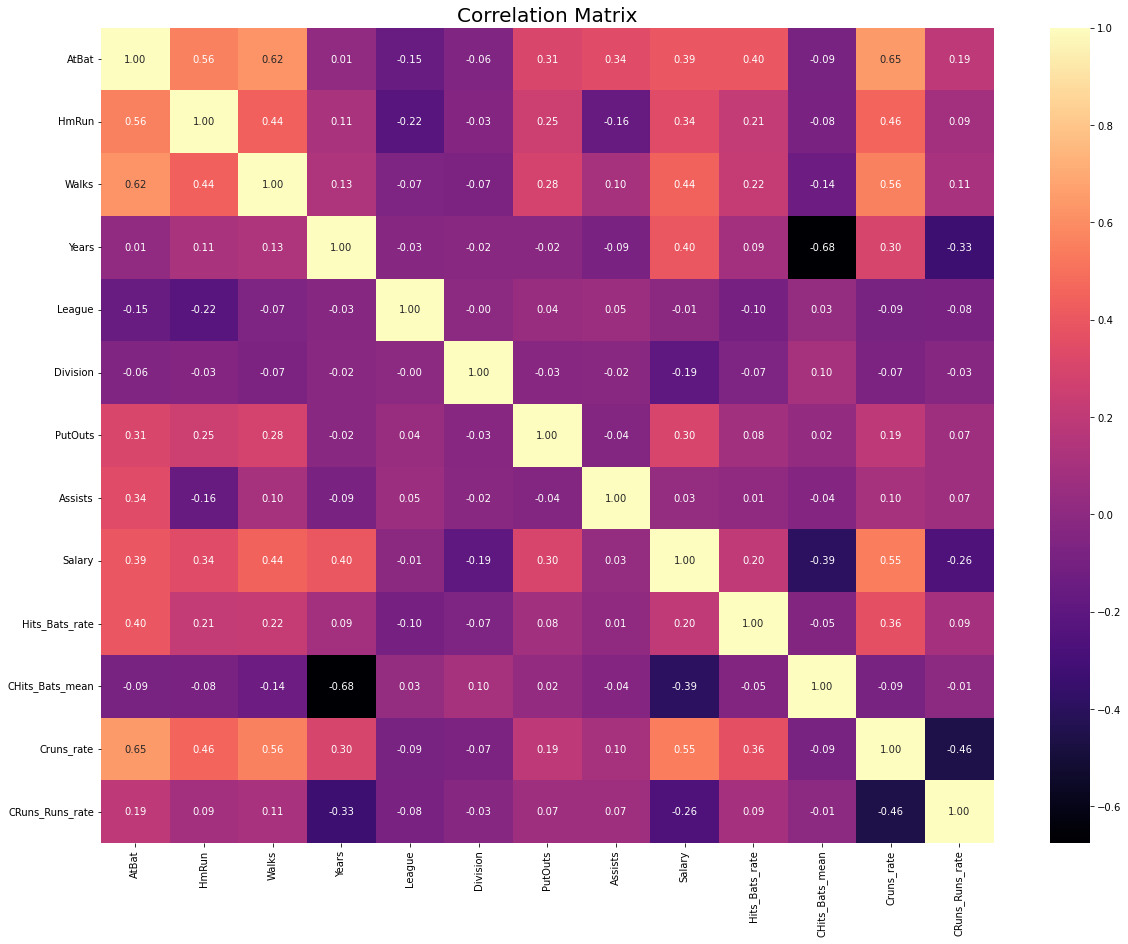

In [44]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [45]:
df.head()

,AtBat,HmRun,Walks,Years,League,Division,PutOuts,Assists,Salary,Hits_Bats_rate,CHits_Bats_mean,Cruns_rate,CRuns_Runs_rate
1,315,7,39,14,1,1,632,43,475.0,0.257143,0.017293,22.928571,1.046729
2,479,18,76,3,0,1,880,82,480.0,0.271399,0.093801,74.666667,0.883929
3,496,20,37,11,1,0,200,11,500.0,0.284274,0.025441,75.272727,0.863527
4,321,10,30,2,1,0,805,40,91.5,0.271028,0.127525,24.000000,1.625000
5,594,4,35,11,0,1,282,421,750.0,0.284512,0.023367,45.545455,1.624750


In [46]:
#modelimiz için bağımlı ve bağımsız değişkenlerimizi belirliyoruz.
y= df["Salary"]
X=df.drop(["Salary"], axis=1)

In [47]:
#train ve test setlerimizi oluşturuyoruz.

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [48]:
#normalization işlemlerimizi yapıyoruz;

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)

In [49]:
X_test=mms.transform(X_test)

In [50]:
reg_model=LinearRegression().fit(X_train,y_train)

In [51]:
#Train RMSE;

y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

271.3010032793005

In [52]:
#Test RMSE;

y_pred1 = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred1))

423.382615223689

In [53]:
df["Salary"].mean()

535.9258821292775

In [54]:
#conda install xgboost

In [55]:
#conda install lightgbm

In [56]:
#Farklı modeller üzerinden de kontrolleri yapabiliriz.

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 0.8]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]}

regressors = [("RF", RandomForestRegressor(), rf_params),
              ('XGBoost', XGBRegressor(objective='reg:squarederror'), xgboost_params),
              ('LightGBM', LGBMRegressor(), lightgbm_params)]


In [57]:
for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")
    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)
    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")
    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

########## RF ##########
RMSE: 274.0074 (RF) 


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

RMSE (After): 264.9657 (RF) 
RF best params: {'max_depth': None, 'max_features': 5, 'min_samples_split': 8, 'n_estimators': 200}

########## XGBoost ##########
RMSE: 323.7698 (XGBoost) 
RMSE (After): 283.2468 (XGBoost) 
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

########## LightGBM ##########
RMSE: 311.0039 (LightGBM) 
RMSE (After): 295.5487 (LightGBM) 
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500}



Default parametreler ve verdiğimiz hiperparametrelerin GridSearchCV yöntemi ile en iyilerinin bulunmasından sonra kurulan final modellerimizin başarıdeğerlendirmesinde metrik olarak seçtiğimiz RMSE  değerleri için en iyi yani en düşük sonucu veren modelimiz RandomForest ağaç yöntemimiz oldu. Modelimizde makismum derinlik için None, her bir ağaç için randomly seçilecek değişken sayımız 5, değişkenimizde 8 gözlem kalması durumunda bölünmenin durduğu ve toplamda da 200 ağacın parelel olarak çalıştığı bir modelimiz ortaya çıktı.
